<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Bird Species Classification Using Convolutional Neural Networks </centre></strong></h1>

<div style="overflow: hidden; width: 100%; height: 200px; position: relative;">
  <img src="xxx" style="position: absolute; top: -100px; width: 50%;"/>
</div>


<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Transforming Images and Splitting the Data</centre></strong></h2>


#### 02.Data Preprocessing

Effective data transformation and splitting strategies are critical for building robust deep learning models. This section will cover image resizing, normalization, augmentation, and splitting the dataset into training, validation, and test sets.<br>
<br>
**Objective:** 
* Preprocess the dataset including image resizing, normalization, and data augmentation.
* Splitting data into training, validation, and test sets.<br>
<br>
---


#### Import Libraries and Load Data:

---

In [32]:
# Import Necessary Libraries
import tensorflow as tf
from keras.src.layers import Rescaling
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast, GaussianNoise, RandomCrop
from tensorflow.keras.layers import Rescaling

#### Image resizing

---

In [23]:
# Define paths
input_folder = '../dataset/raw/CUB_200_2011/images/'

train_validation_dataset = tf.keras.utils.image_dataset_from_directory(
    input_folder,
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    shuffle=True,
    validation_split=0.2,
    subset='both',  # Load both training and validation data
    seed=42
)

Found 1466 files belonging to 25 classes.
Using 1173 files for training.
Using 293 files for validation.


#### Split the dataset into training and validation datasets

---


number of classes in dataset:  25
Class names: ['007.Parakeet_Auklet', '012.Yellow_headed_Blackbird', '014.Indigo_Bunting', '017.Cardinal', '018.Spotted_Catbird', '025.Pelagic_Cormorant', '035.Purple_Finch', '040.Olive_sided_Flycatcher', '044.Frigatebird', '054.Blue_Grosbeak', '056.Pine_Grosbeak', '060.Glaucous_winged_Gull', '061.Heermann_Gull', '075.Green_Jay', '079.Belted_Kingfisher', '088.Western_Meadowlark', '095.Baltimore_Oriole', '097.Orchard_Oriole', '109.American_Redstart', '123.Henslow_Sparrow', '128.Seaside_Sparrow', '143.Caspian_Tern', '145.Elegant_Tern', '158.Bay_breasted_Warbler', '189.Red_bellied_Woodpecker']


<module 'matplotlib.pyplot' from 'D:\\ISEP-repos\\mei_aprof\\CNN\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

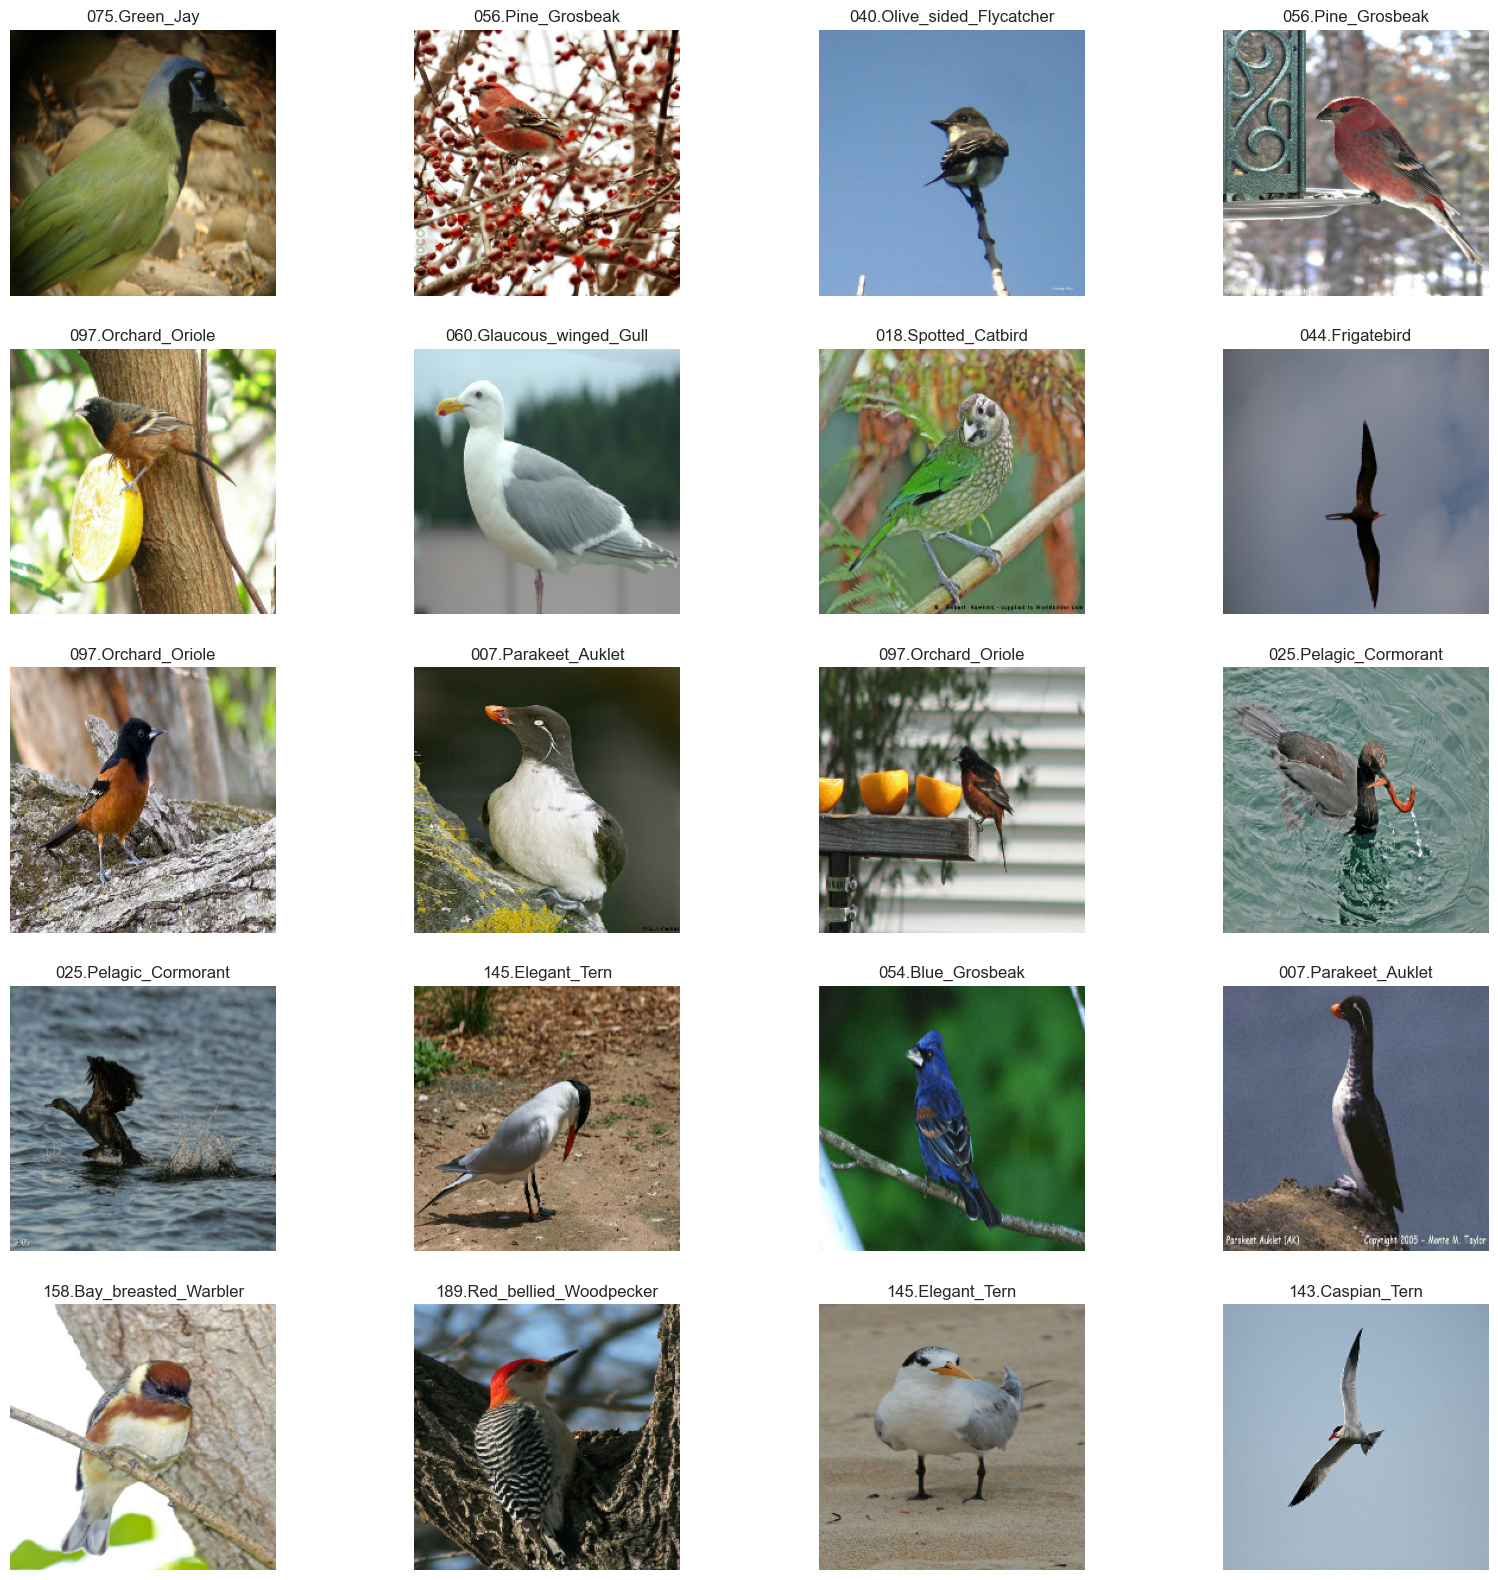

In [28]:
train_dataset = train_validation_dataset[0]
validation_dataset = train_validation_dataset[1]

# Number of classes
num_classes = len(train_dataset.class_names)
class_labels = train_dataset.class_names

print("number of classes in dataset: ", num_classes)
print("Class names:", class_labels)

plt.figure(figsize=(20, 20))
for image_batch, image_label in train_dataset.take(1):
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

plt


#### Normalize images to the range[0,1]

---

In [33]:
# Aplicar normalização
normalization_layer = Rescaling(1./255)

normalized_train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
normalized_validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))


#### Define data augmentation approaches

---------------

Augmentation pipeline_1


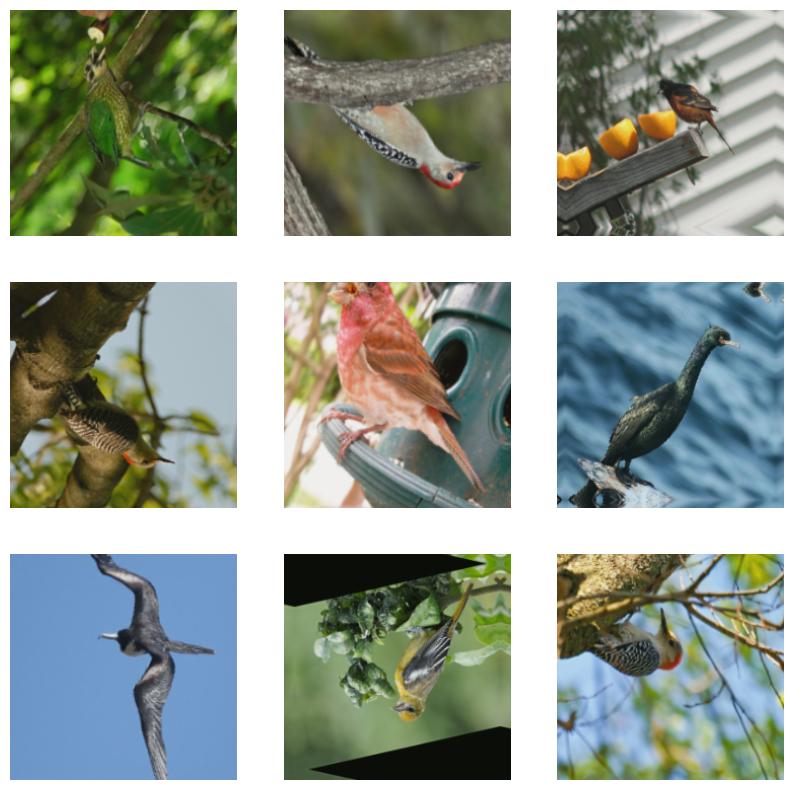

In [34]:
# Augmentation pipeline_1
data_augmentation_1 = Sequential([
    RandomFlip('horizontal_and_vertical'),  # Flip horizontal e vertical
    RandomRotation(0.2),  # Rotação aleatória até 20%
    RandomZoom(0.2),  # Zoom aleatório até 20%
    RandomContrast(0.2),  # Ajuste de contraste aleatório
    GaussianNoise(stddev=0.1)  # Ruído gaussiano com desvio padrão de 0.1
])

plt.figure(figsize=(10, 10))
print("Augmentation pipeline_1")
for images, _ in train_dataset.take(1):
    augmented_images = data_augmentation_1(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

Augmentation pipeline_2


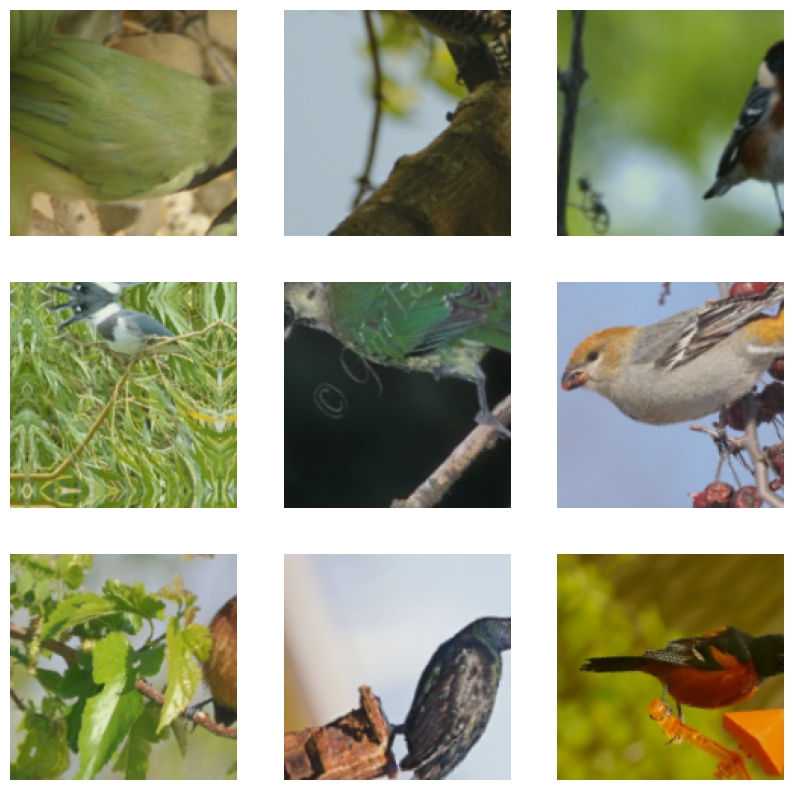

In [35]:
# Augmentation pipeline_2
data_augmentation_2 = Sequential([
    RandomCrop(height=150, width=150),  # Random crop to size 150x150
    RandomRotation(0.2),  # Rotação aleatória até 20%
    RandomZoom(0.2),  # Zoom aleatório até 20%
    RandomContrast(0.6),  # Ajuste de contraste aleatório
    GaussianNoise(stddev=0.1)  # Ruído gaussiano com desvio padrão de 0.1
])

plt.figure(figsize=(10, 10))
print("Augmentation pipeline_2")
for images, _ in train_dataset.take(1):
    augmented_images = data_augmentation_2(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Model Architecture </centre></strong></h2>

#### 03.Model Development
##### Convolutional Neural Networks (CNN) for Bird Species Classification
**Objective:** Train a custom CNN model on the preprocessed dataset.

**Model Training:** <br>
<br>
 - **Base Model:**
    
    + We will define a simple CNN model in Keras and train it on the CUB 200_2011 dataset. Recall from a previous post the following steps required to define and train a model in Keras.      
             - Build/Define a network model using predefined layers in Keras.
             - Compile the model with model.compile()
             - Train the model with model.fit()
 
    + Defines the CNN architecture using Keras layers such as Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
    + Compiles the model with the Adam optimizer and categorical cross-entropy loss.
 
 - **Training and Evaluation:**
    + Utilizes EarlyStopping and ModelCheckpoint callbacks for efficient training.
    + Trains the model and evaluates its performance on the validation set.
    + Includes code to visualize training and validation accuracy over epochs.

---
#### CNN1


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,665 (1.29 MB)

 Trainable params: 338,665 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.0491 - loss: 3.2172 - val_accuracy: 0.0512 - val_loss: 3.1158
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.0639 - loss: 3.0846 - val_accuracy: 0.0683 - val_loss: 3.0829
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.1093 - loss: 2.9788 - val_accuracy: 0.0922 - val_loss: 3.0436
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.1678 - loss: 2.8015 - val_accuracy: 0.1229 - val_loss: 2.8981
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.2159 - loss: 2.6314 - val_accuracy: 0.1672 - val_loss: 2.8346
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.2960 - loss: 2.3984 - val_accuracy: 0.2014 - val_loss: 2.6808
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.3513 - loss: 2.1767 - val_accuracy: 0.1809 - val_loss: 2.8459
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.3857 - loss: 2.0292 - val_accuracy: 0.2048 - v

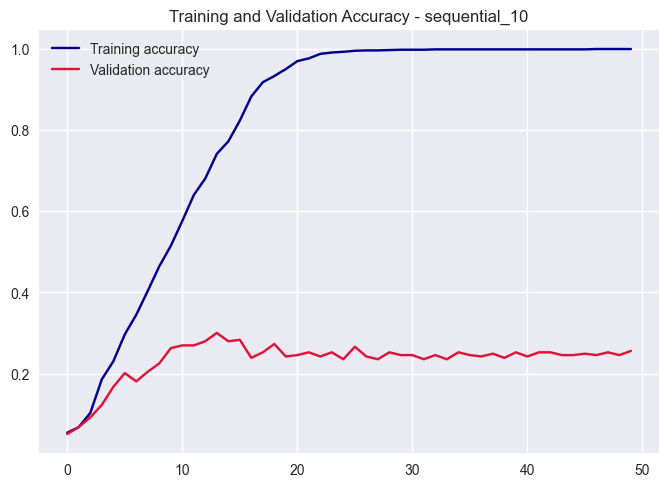

<Figure size 800x550 with 0 Axes>

In [39]:
model_1 = Sequential([
    Conv2D(8, (3, 3), padding="same", input_shape=(224, 224, 3), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),
    Conv2D(16, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model_1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model_1.summary()

history_1 = model_1.fit(
    normalized_train_dataset,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=normalized_validation_dataset
)

loss, accuracy = model_1.evaluate(normalized_validation_dataset)

print(f'Loss: {loss}, Accuracy: {accuracy}')

plt.style.use('seaborn-v0_8')

model_name = history_1.model.name

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'darkblue', label='Training accuracy')
plt.plot(epochs, val_acc, 'crimson', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy - {model_name}', fontsize=12)
plt.legend(loc=0)
plt.figure()

plt.show()

model_1.save('../models/custom_cnn/bird_species_model_1.keras')

D:\ISEP-repos\mei_aprof\CNN\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │           825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,015,997 (3.88 MB)

 Trainable params: 338,665 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 677,332 (2.58 MB)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.3889 - loss: 403.0345 - val_accuracy: 0.0683 - val_loss: 3.2323
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.0658 - loss: 4.4616 - val_accuracy: 0.0683 - val_loss: 3.2092
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.1029 - loss: 3.4179 - val_accuracy: 0.0717 - val_loss: 3.2062
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.1369 - loss: 3.0445 - val_accuracy: 0.0478 - val_loss: 3.2038
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.1434 - loss: 2.9066 - val_accuracy: 0.0512 - val_loss: 3.2028
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.1678 - loss: 2.8260 - val_accuracy: 0.0478 - val_loss: 3.2019
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1707 - loss: 2.7848 - val_accuracy: 0.0546 - val_loss: 3.2013
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.1898 - loss: 2.7216 - val_accuracy: 0.0580 -

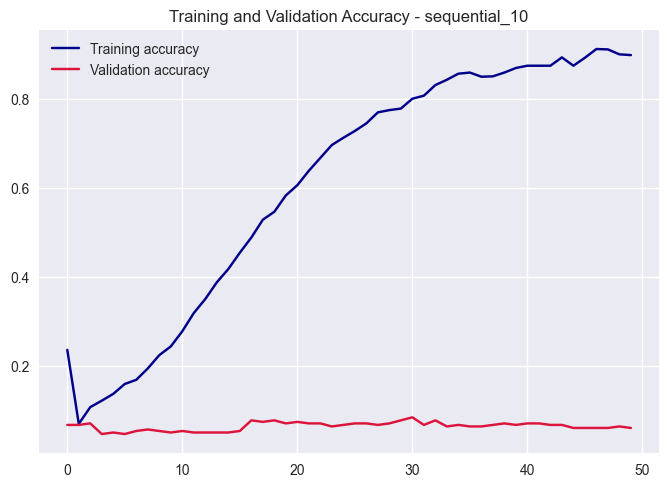

<Figure size 800x550 with 0 Axes>

In [40]:
model_2 = Sequential([
    #data_augmentation_1,  # Incluir a camada de aumento de dados
 
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax'),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
    
])

model_1.summary()

model_2.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_2 = model_1.fit(
    train_dataset,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=normalized_validation_dataset
)

loss, accuracy = model_1.evaluate(normalized_validation_dataset)

print(f'Loss: {loss}, Accuracy: {accuracy}')


plt.style.use('seaborn-v0_8')

model_name = history_2.model.name

acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'darkblue', label='Training accuracy')
plt.plot(epochs, val_acc, 'crimson', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy - {model_name}', fontsize=12)
plt.legend(loc=0)
plt.figure()

plt.show()

model_2.save('../models/custom_cnn/bird_species_model_2.keras')

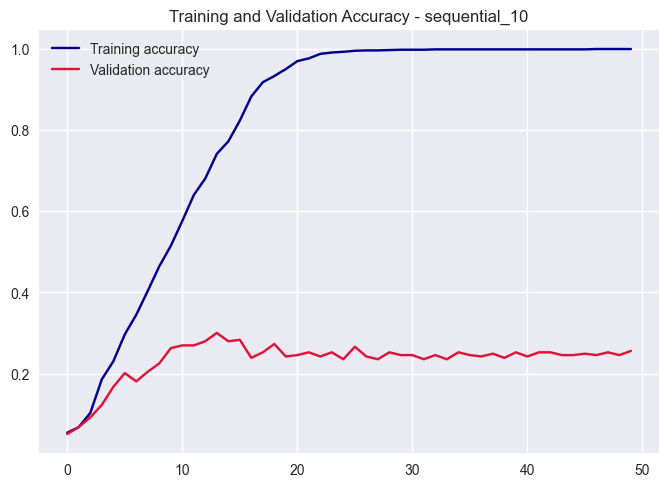

<Figure size 800x550 with 0 Axes>

In [41]:
plt.style.use('seaborn-v0_8')

model_name = history_1.model.name

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'darkblue', label='Training accuracy')
plt.plot(epochs, val_acc, 'crimson', label='Validation accuracy')
plt.title(f'Training and Validation Accuracy - {model_name}', fontsize=12)
plt.legend(loc=0)
plt.figure()

plt.show()